In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
bc=pd.read_csv('breast-cancer-wisconsin.csv')


In [49]:
from sklearn import preprocessing

In [52]:
for column in bc.columns:
    if bc[column].dtype == type(object):
        le =preprocessing.LabelEncoder()
        bc[column] = le.fit_transform(bc[column])

In [53]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 698
Data columns (total 11 columns):
Sample Code Number             699 non-null int64
Thickness                      699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Ephithlial Cell Size    699 non-null int64
Bare Nuclie                    699 non-null int64
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Metosis                        699 non-null int64
Class                          699 non-null category
dtypes: category(1), int64(10)
memory usage: 60.8 KB


In [54]:
bc.isnull()

,Sample Code Number,Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Ephithlial Cell Size,Bare Nuclie,Bland Chromatin,Normal Nucleoli,Metosis,Class
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


In [55]:
import seaborn as sns

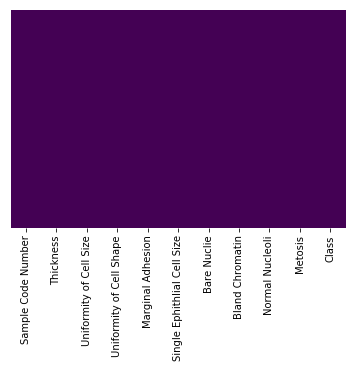

In [56]:
sns.heatmap(bc.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [57]:
bc=bc.dropna()

In [58]:
bc.describe()

,Sample Code Number,Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Ephithlial Cell Size,Bare Nuclie,Bland Chromatin,Normal Nucleoli,Metosis
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,1.417740,3.437768,2.866953,1.589413
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.499862,2.438364,3.053634,1.715078
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,0.000000,2.000000,1.000000,1.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,0.000000,3.000000,1.000000,1.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,1.000000,5.000000,4.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [59]:
bc['Class']=bc['Class'].astype('category')

In [60]:
X=bc.drop(['Class'],axis=1)


In [61]:
X=X.values

In [62]:
Y_raw=bc['Class'].values

In [63]:
import sklearn

In [64]:
from sklearn import preprocessing

In [65]:
label_enc=preprocessing.LabelEncoder()

In [66]:
label_enc.fit(Y_raw)

LabelEncoder()

In [67]:
Y=label_enc.transform(Y_raw)

In [68]:
print(X)

[[1000025       5       1 ...       3       1       1]
 [1002945       5       4 ...       3       2       1]
 [1015425       3       1 ...       3       1       1]
 ...
 [ 888820       5      10 ...       8      10       2]
 [ 897471       4       8 ...      10       6       1]
 [ 897471       4       8 ...      10       4       1]]


In [69]:
import sklearn.model_selection as ms

In [70]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, Y, test_size=0.3, random_state=1)

In [71]:
from sklearn.linear_model import LogisticRegression

In [109]:
pen_val =['l1','l2']
C_val=2.**np.arange(-5,10,step=2)

In [114]:
grid_s=[{'C':C_val,'penalty':pen_val}]

In [115]:
model=LogisticRegression()

In [116]:
from sklearn.model_selection import GridSearchCV


In [117]:
cv_logr = GridSearchCV(estimator=model,param_grid=grid_s,cv=10)

In [118]:
cv_logr.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'penalty': ['l1', 'l2'], 'C': array([3.125e-02, 1.250e-01, 5.000e-01, 2.000e+00, 8.000e+00, 3.200e+01,
       1.280e+02, 5.120e+02])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [120]:
best_c =cv_logr.best_params_['C']
best_penalty = cv_logr.best_params_['penalty']

In [133]:
print("The best parameters are: cost= {0} and penalty = {1}".format(best_c, best_penalty))

The best parameters are: cost= 0.5 and penalty = l1


In [136]:
b_clf =LogisticRegression(C=best_c,penalty=best_penalty)

In [137]:
b_clf.fit(X_train,y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [138]:
predict = b_clf.predict(X_test)

In [139]:
y_proba = b_clf.predict_proba(X_test)

In [140]:
print(b_clf.score(X_test,y_test))

0.9714285714285714
